<a href="https://colab.research.google.com/github/TurboPug2101/Computer-Vision/blob/main/YoloNAS_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [2]:
!pip install torchinfo

restart runtime

In [4]:
from super_gradients.training import models


The console stream is logged into /root/sg_logs/console.log


[2023-07-14 05:56:26] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-07-14 05:56:33] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-07-14 05:56:33] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-07-14 05:56:33] WARNING - export.py - Failed to import pytorch_quantization
[2023-07-14 05:56:33] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [5]:
from torchinfo import summary

Instantiating pretrained model

In [9]:
yolo_nas_s = models.get("yolo_nas_s", pretrained_weights="coco")

[2023-07-14 05:59:08] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


Model Architecture

In [4]:
summary(model=yolo_nas_s,
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_S (YoloNAS_S)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

Inference

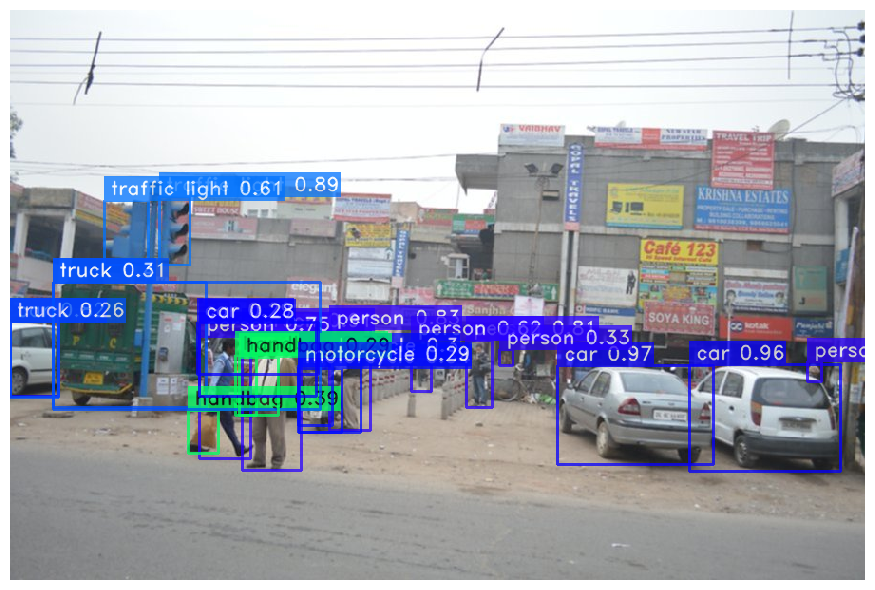

In [10]:
url='https://www.leasing.net.in/public/projectimage/15253372951505194972_chitranjan%20park%20market-1.jpg'
yolo_nas_s.predict(url,conf=0.25).show()

In [14]:
vid_path='/content/pexels_videos_1721294 (1080p) (1).mp4'
output_vid_path='yoloNASDetection.mp4'

In [15]:
import torch
device='cuda' if torch.cuda.is_available() else "cpu"

In [16]:
yolo_nas_s.to(device).predict(vid_path).save(output_vid_path)

Predicting Video: 100%|██████████| 513/513 [00:20<00:00, 25.41it/s]


In [ ]:
import torch

vid_path = '/content/pexels_videos_1721294 (1080p) (1) (1).mp4'
output_vid_path = 'yoloNASDetection.mp4'
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Assuming yolo_nas_s is an instance of your YOLO model
yolo_nas_s.to(device).predict(vid_path).save(output_vid_path)


# *Display Output*

In [17]:
from IPython.display import HTML
import base64
import os
from base64 import b64encode

In [19]:
from moviepy.editor import VideoFileClip
from IPython.display import display, Video

video_path = '/content/yoloNASDetection.mp4'
output_video_path = '/content/yoloNASDetection.mp4_reduced.mp4'

# Reduce video size
clip = VideoFileClip(video_path)
clip_resized = clip.resize(height=480)
clip_resized.write_videofile(output_video_path)

# Create a Video object with the reduced-size video file path
video = Video(output_video_path, embed=True)

# Display the video
display(video)

Moviepy - Building video /content/yoloNASDetection.mp4_reduced.mp4.
Moviepy - Writing video /content/yoloNASDetection.mp4_reduced.mp4

